In [67]:
from datetime import datetime
from tkinter import filedialog
from tkinter import messagebox
from tkinter import filedialog
import tkinter as tk
import os
import pandas as pd
from matplotlib import pyplot as plt
from tkinter.filedialog import askopenfilename

In [68]:
filtro_byte = 3
filtro_pgn = '32d'
filtro_byte = f'byte_{filtro_byte}'
print(f"{filtro_byte} e {filtro_pgn}")

byte_3 e 32d


In [69]:
def process_data(hex_data, type = 'df'):
    if type == 'row':

        if isinstance(hex_data, str):
            return hex_data.split(' ')
        return []

    elif type == 'df':
        # Verifica se a entrada é uma string
        if isinstance(hex_data, str):
            byte_list = hex_data.split(' ')

            # Verifica se a lista contém exatamente 8 itens
            if len(byte_list) < 8:
                byte_list.extend(['00'] * (8 - len(byte_list)))

            # Converte os valores de hexadecimal para decimal
            byte_list = [int(byte, 16) for byte in byte_list]

            # Converte a lista em um DataFrame com uma linha e 8 colunas
            df = pd.DataFrame([byte_list])

            return byte_list  # Retorna a lista para ser expandida em colunas
        else:
            raise ValueError("A entrada deve ser uma string hexadecimal.")


In [70]:
def fileToDataframe(file_path):
    df = pd.read_csv(file_path, sep=';', quotechar='"', skiprows=6)
    df = df.dropna(subset=['Data (hex)'])
    df['Identifier (hex)'] = df['Identifier (hex)'].apply(lambda x: int(x, 16))

    byte_columns = df['Data (hex)'].apply(process_data)
    
    byte_columns = pd.DataFrame(byte_columns.tolist(), index=df.index, columns=[f'byte_{i + 1}' for i in range(8)])
    print(byte_columns)
    columns_to_drop = ['Format', 'Flags', 'Time', 'Data (hex)']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    df = pd.concat([df, byte_columns], axis=1)
    df = df.rename(columns={'Identifier (hex)': 'pgn'})
    return df


In [71]:
def ui_load_ixxt_archive():
    file_path = filedialog.askopenfilename(
        title="Selecione o arquivo CSV",
        filetypes=(("CSV files", "*.CSV"), ("all files", "*.*"))
    )
    if file_path:
        df = fileToDataframe(file_path)  # Simulação do carregamento de dados
        return df

        messagebox.showinfo("Informação", "Arquivo carregado com sucesso!")


In [72]:
def save_df_raw(df):
    if df is None:
        messagebox.showwarning("Aviso", "Carregue um arquivo primeiro.")
        return

    save_path = filedialog.asksaveasfilename(
        defaultextension=".csv",
        filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
        title="Salvar o DataFrame completo"
    )

    if save_path:
        df.to_csv(save_path, index=False)
        messagebox.showinfo("Sucesso", "DataFrame salvo com sucesso!")


In [73]:
df_raw = ui_load_ixxt_archive()  #26s #29,5 #30,7 #42,6
save_df_raw(df_raw)

       byte_1  byte_2  byte_3  byte_4  byte_5  byte_6  byte_7  byte_8
0          24      72      48       0      76      50      48      48
1          48      48       0      97     187     164      32       0
2          50       0     240       0       0       0       0       0
3          24       0       0       1       0      82       0       0
4         255     153       0       7     173       0      32       0
...       ...     ...     ...     ...     ...     ...     ...     ...
69062       0       0      13     156     175     198      70       0
69063       0       0       0       3       0       0       0       0
69064       0       0       0       0       0       0       0       0
69065      32       9      64       2     208       7       0       0
69066       0      80       0       7      19       0      32       0

[69045 rows x 8 columns]


In [112]:
def filtrar_dataframe(df, filtro_pgn, filtro_byte):

    if df is None:
        messagebox.showwarning("Aviso", "Carregue um arquivo primeiro.")
        return None

    if filtro_pgn and filtro_byte:
        try:
            filtered_df = df[df['pgn'] == int(filtro_pgn, 16)]  # Se pgn for uma string hexadecimal

            # Verificar se o byte filtrado existe
            if filtro_byte in filtered_df.columns:
                # Filtrar os valores do byte especificado que não são 'FF' (255 em decimal)
                filtered_df = filtered_df[[filtro_byte]]
                #filtered_df = filtered_df[filtered_df[filtro_byte] != 255]
                filtered_df = filtered_df.rename(columns={filtro_byte: 'x'})


                if not filtered_df.empty:
                    filtered_df = filtered_df
                    return filtered_df
                else:
                    messagebox.showinfo("Informação", "Nenhum valor diferente de FF encontrado após filtrar.")
                    return None
            else:
                messagebox.showinfo("Informação", f"A coluna {filtro_byte} não existe.")
                return None
        except Exception as e:
            messagebox.showerror("Erro", f"Erro ao aplicar filtros: {str(e)}")
            return None
    else:
        messagebox.showwarning("Aviso", "Preencha os campos de filtro antes de filtrar.")
        return None

In [75]:
def save_df_train(train_df):
    if train_df is None:
        messagebox.showwarning("Aviso", "Carregue um arquivo primeiro.")
        return

    save_path = filedialog.asksaveasfilename(
        defaultextension=".csv",
        filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
        title="Salvar o DataFrame de treino completo"
    )

    if save_path:
        train_df.to_csv(save_path, index=False)
        messagebox.showinfo("Sucesso", "DataFrame de treino salvo com sucesso!")

In [76]:
filtered_df = filtrar_dataframe(df_raw, filtro_pgn, filtro_byte)
filtered_df.head()


,x
22,1
46,1
67,1
92,1
114,1


In [77]:
# def load_train_df():
#     file_path = filedialog.askopenfilename(
#         title="Selecione o arquivo CSV",
#         filetypes=(("CSV files", "*.csv"), ("all files", "*.*"))
#     )
#     if file_path:
#         df_raw = pd.read_csv(file_path, sep=';', quotechar='"')
#         return df_raw
#         messagebox.showinfo("Informação", "Arquivo carregado com sucesso!")

In [78]:

# if filtered_df is None:
#         # Carregar o arquivo
#         df_raw = load_train_df()

#         # Verifica se o DataFrame foi carregado com sucesso
#         if df_raw is None:
#             # Aplica o filtro
#             filtered_df = train_filtrar_dataframe(df_raw, filtro_pgn, filtro_byte)

In [113]:
import matplotlib.pyplot as plt
from tkinter import messagebox

def vizData(df):
    if df is None:
        messagebox.showwarning("Aviso", "Carregue um arquivo primeiro.")
        return

    # Visualização da coluna específica
    plt.figure(figsize=(20, 10), dpi=100)
    plt.plot(range(len(df)), df['x'], linestyle='-', color='b',
                linewidth=0.7, label='x')
    plt.xlabel('X')
    plt.ylabel('Value')
    plt.title(f"Visualização de Dados - PGN: {filtro_pgn}, Byte: {filtro_byte}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

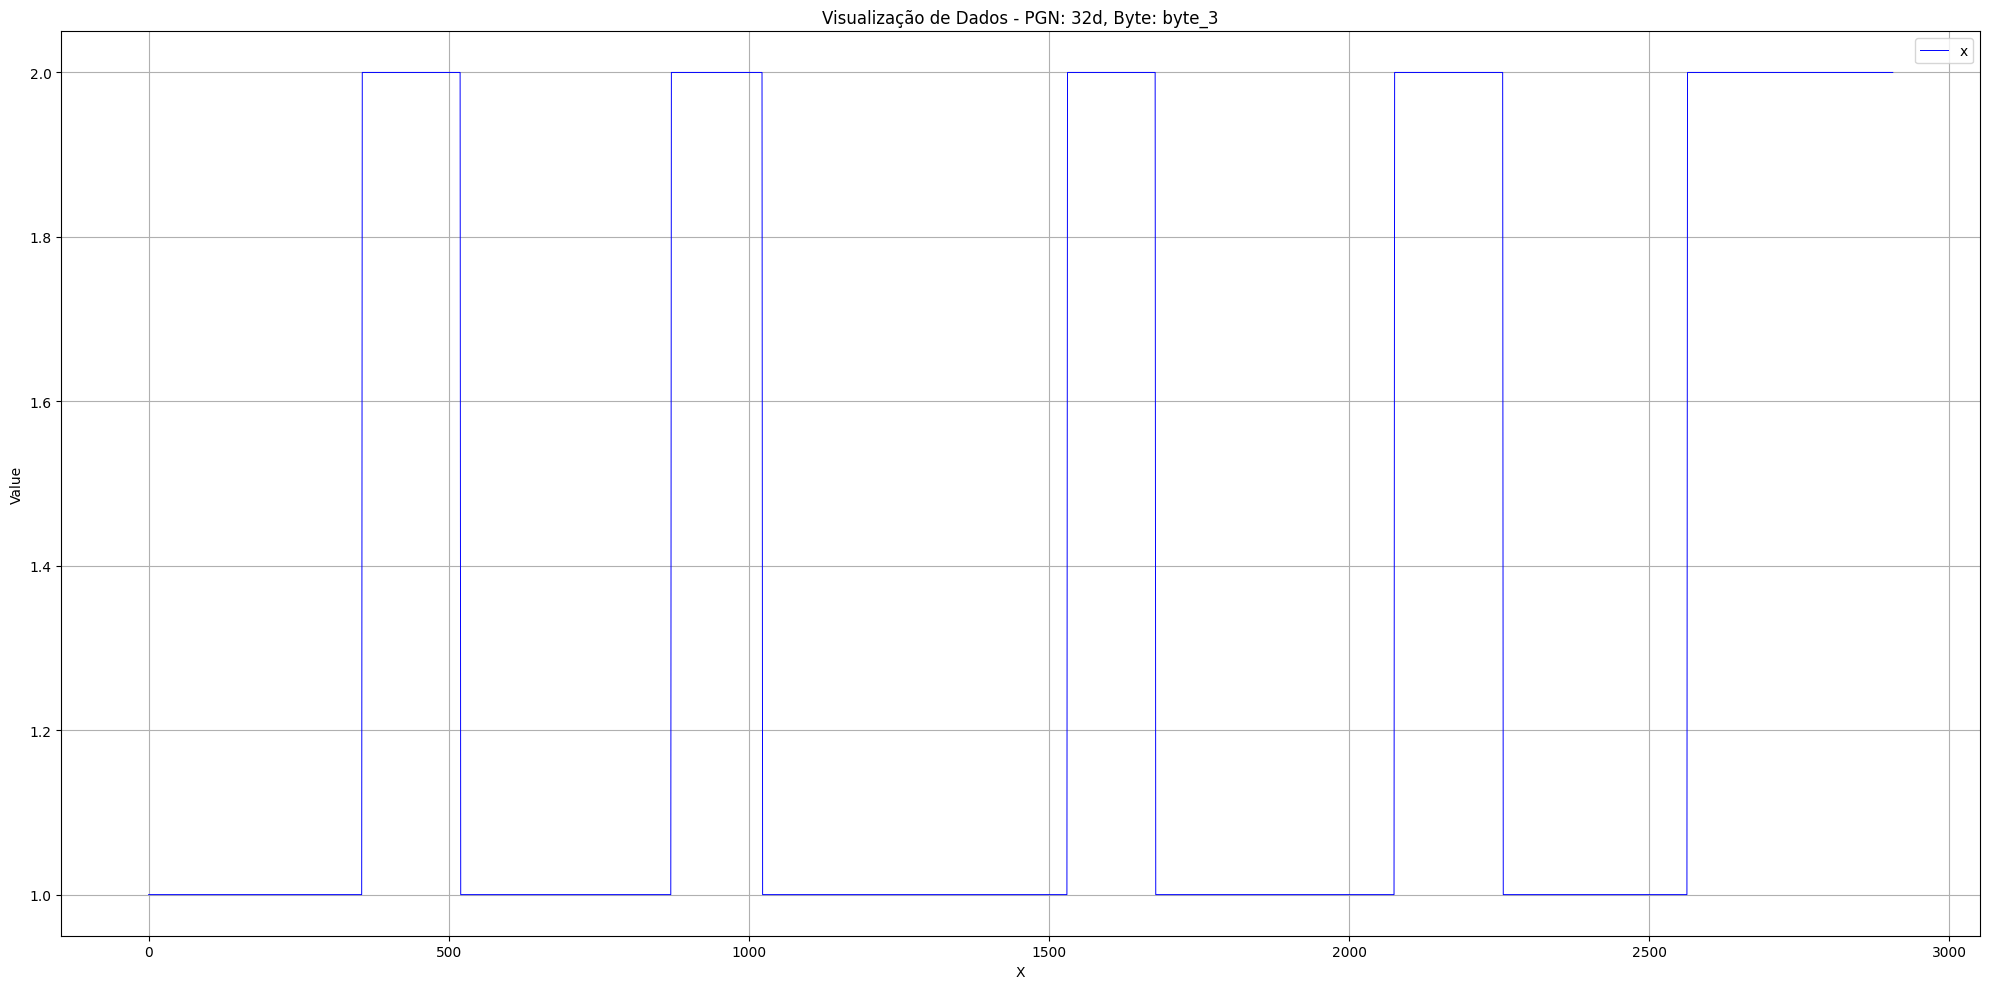

In [84]:
vizData(filtered_df)

In [86]:
def rotular_df(df, label):
    # Dicionário para mapeamento de rótulos textuais para numéricos
    label_dict = {
        "Onda Quadrada": 1,
        "Onda Seno": 2,
        "Onda Triangular": 3
    }

       # Verifica se o rótulo textual existe no dicionário
    if label not in label_dict:
        raise ValueError(f"Rótulo '{label}' não é válido. Use 'Onda Quadrada', 'Onda Seno' ou 'Onda Triangular'.")
    
    numeric_label = label_dict[label]

    if df is None:
        raise ValueError("O dataframe está vazio, carrega 'treino'")
    else:
        # Preencher o DataFrame com o valor numérico correspondente
        labeled_df = df.copy()
        labeled_df['label'] = numeric_label

    return labeled_df

In [87]:
train_df = rotular_df(filtered_df)
train_df.head()

,x,label
22,1,1
46,1,1
67,1,1
92,1,1
114,1,1


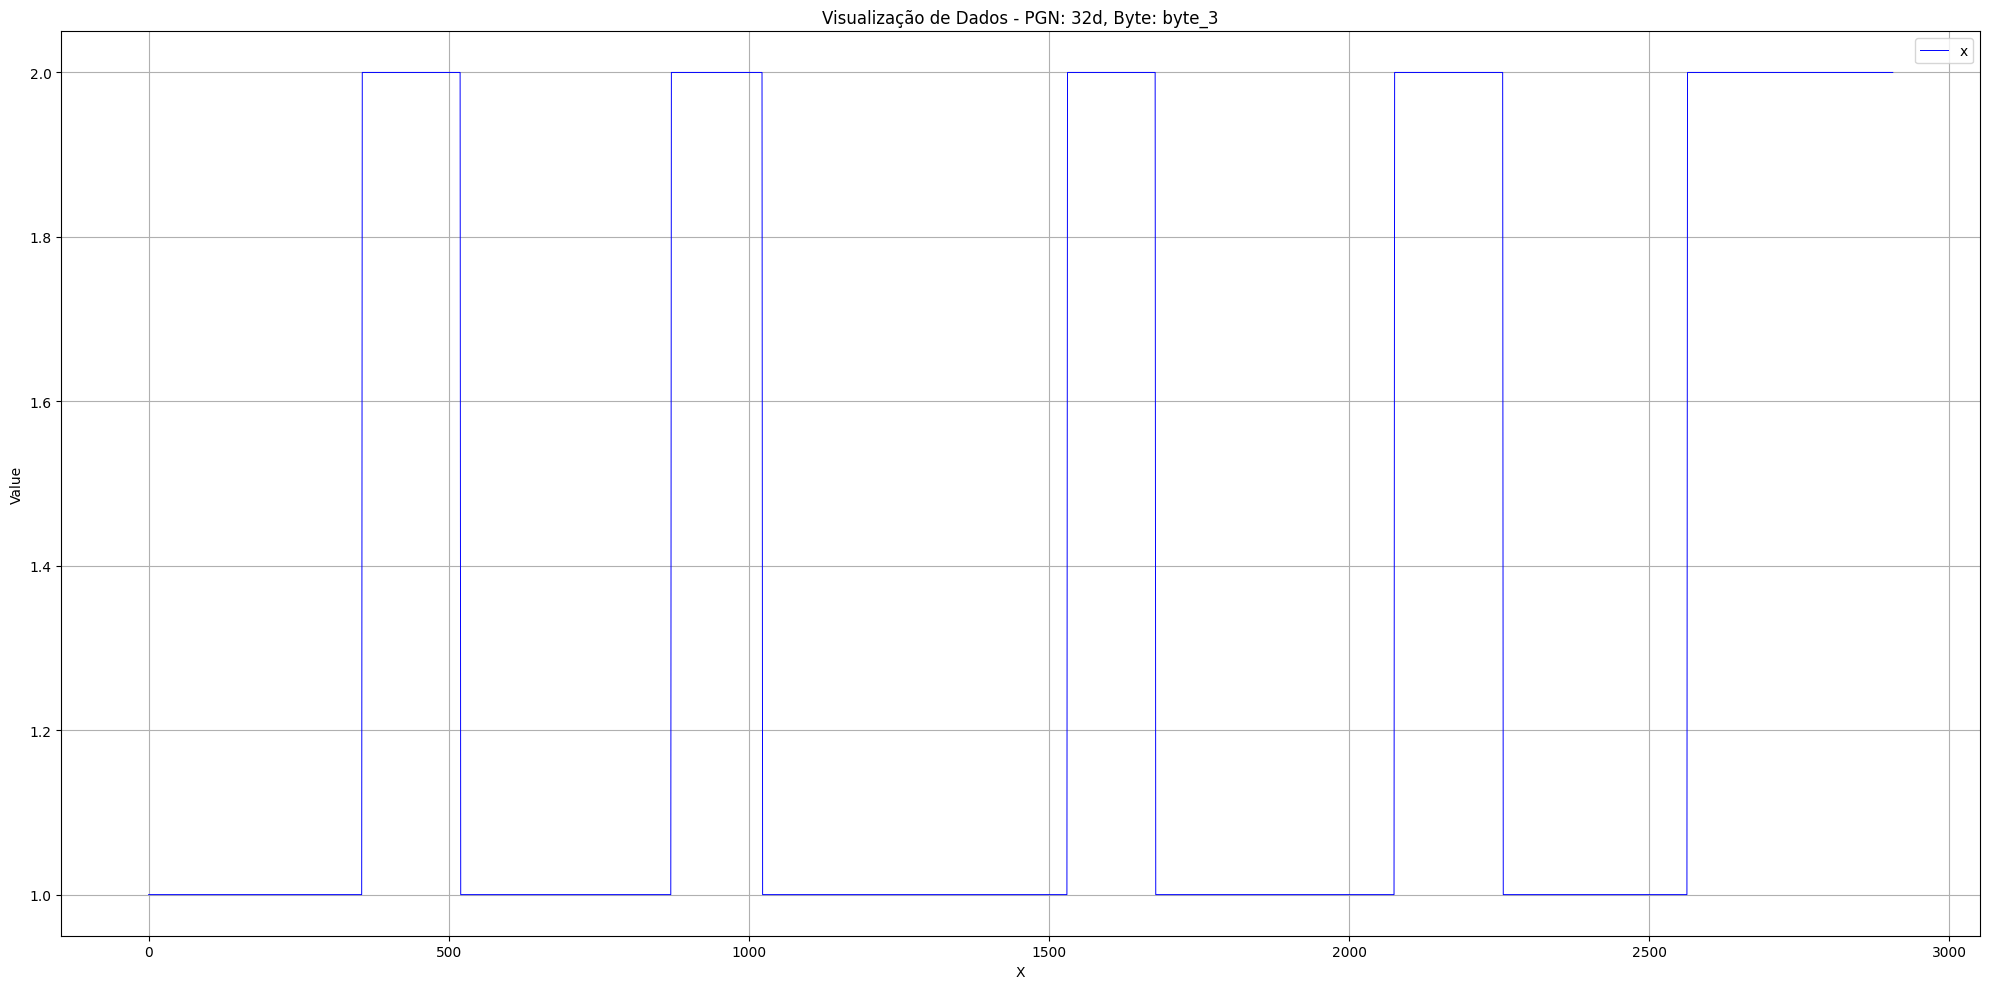

In [88]:
vizData(filtered_df)
save_df_train(filtered_df)

In [118]:
filtro_byte = 5
filtro_pgn = '208'
filtro_byte = f'byte_{filtro_byte}'
print(f"{filtro_byte} e {filtro_pgn}")

byte_5 e 208


In [119]:
df_raw = ui_load_ixxt_archive()  #26s #29,5 #30,7 #42,6
save_df_raw(df_raw)

       byte_1  byte_2  byte_3  byte_4  byte_5  byte_6  byte_7  byte_8
0         255     253       0       0      11      34      96     185
1         127     192       1       0     128       0       0       0
2           0       0      50       0      12      50      50      50
3          50       0       0      55       0       4       0       0
4         255     196       0       7      75       0      32       0
...       ...     ...     ...     ...     ...     ...     ...     ...
13182       0       0      50       0      12      50      50      50
13183      50       0       0      55       0       4       0       0
13184       0      50      41      50     193       1      68       0
13185     255     196       0       7      75       0      32       0
13186       8       0       0       0       0       0       0       0

[13187 rows x 8 columns]


In [120]:
filtered_df = filtrar_dataframe(df_raw, filtro_pgn, filtro_byte)
filtered_df.head()

,x
2,12
10,12
22,12
35,12
46,12


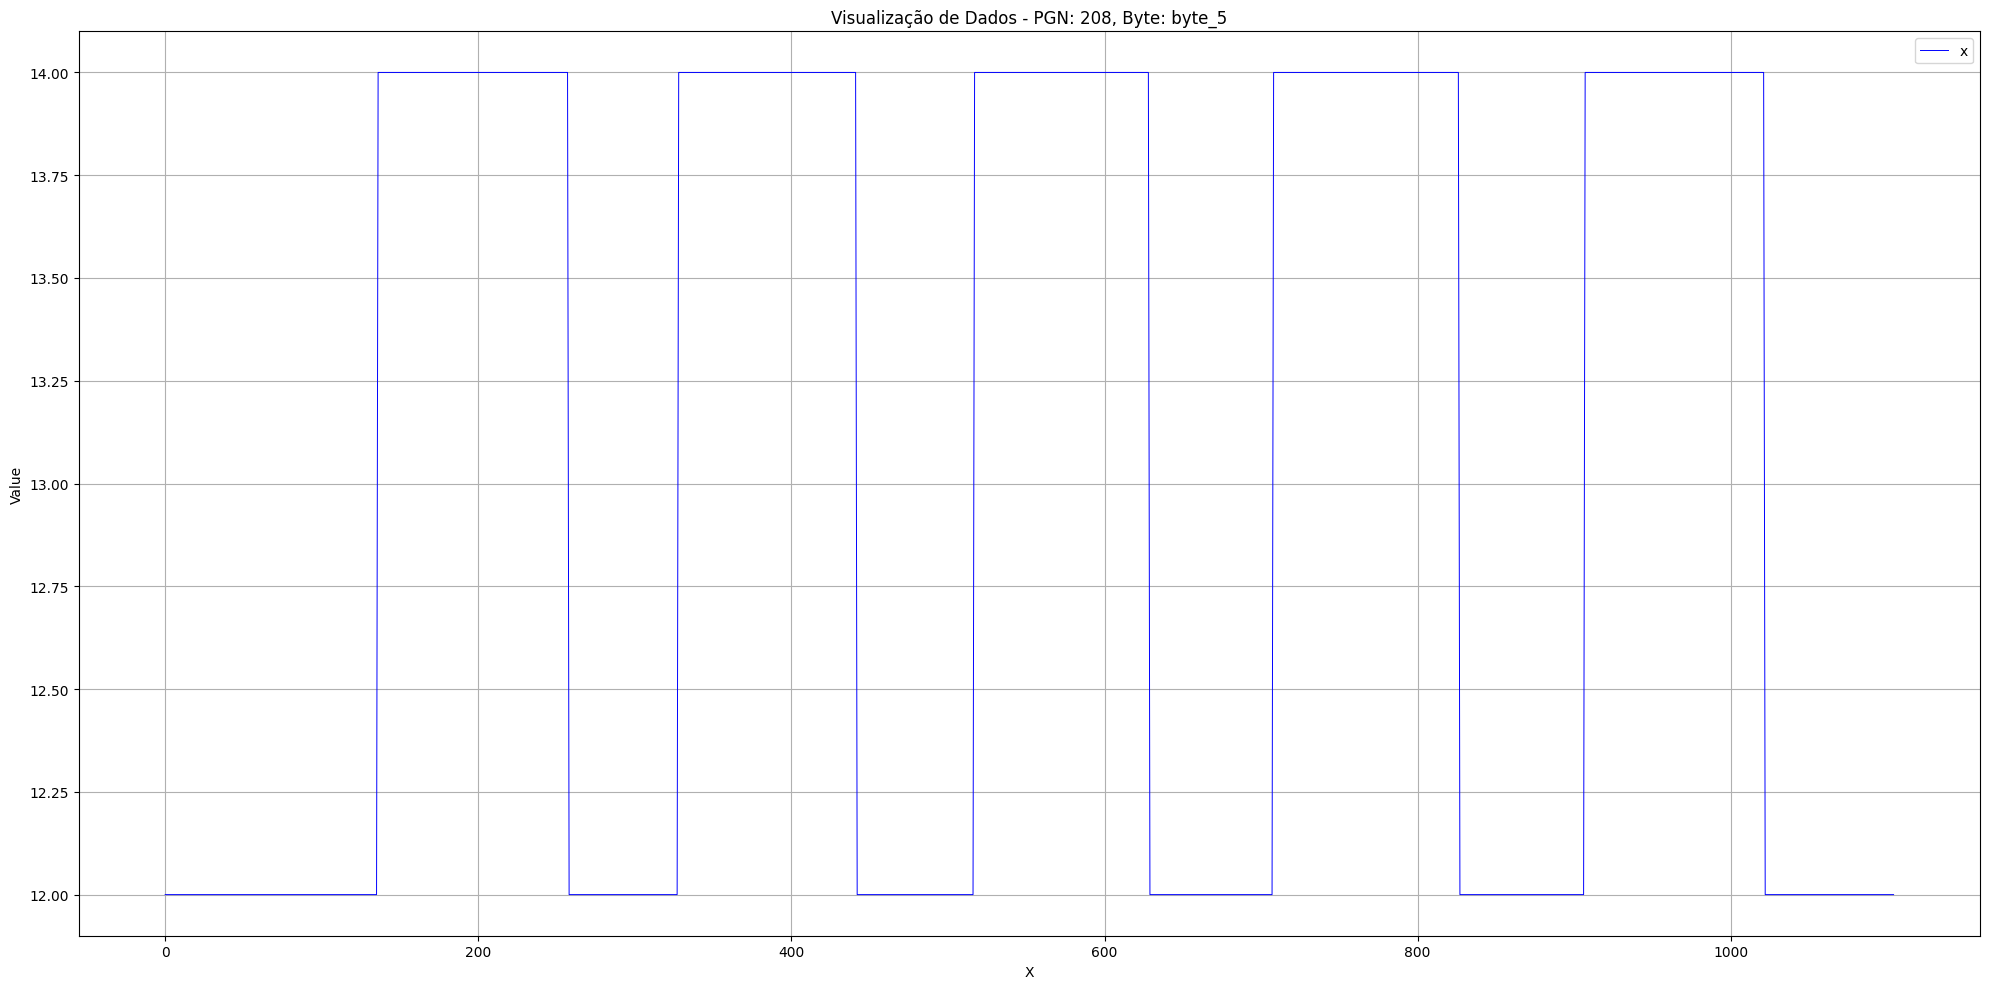

In [121]:
vizData(filtered_df)

In [124]:
train_df = rotular_df(filtered_df, label="Onda Quadrada")
train_df.tail()

,x,label
13138,12,1
13145,12,1
13158,12,1
13171,12,1
13182,12,1


In [ ]:
def concatenate_dataframes(df_list):

    # Concatenar os DataFrames verticalmente
    concatenated_df = pd.concat(df_list, axis=0)
    
    # Manter apenas as colunas 'X' e 'label'
    concatenated_df = concatenated_df[['X', 'label']]
    
    return concatenated_df

In [ ]:
concatenated_df = concatenate_dataframes([df1, df2])